In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [34]:
# 1. Leer el archivo ya con fechas como índice
file_path = 'LD2011_2014.txt' 
df = pd.read_csv(file_path, sep=';', index_col=0, parse_dates=True, decimal=',')

# 2. Agrupación por hora (recomendado)
# Si quieres quitar esto, comenta las 2 líneas siguientes y descomenta la línea: "df_filtrado = df"
df['hora'] = df.index.floor('h')
df_filtrado = df.groupby('hora').mean()

# Si prefieres no agrupar por hora:
# df_filtrado = df

In [35]:
# 3. Preparar datos para clustering
# (en este ejemplo no hay etiqueta, así que aplicamos clustering puro)
X = df_filtrado.values

In [36]:
# 4. Clustering KMeans
k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
X_dist = kmeans.fit_transform(X)

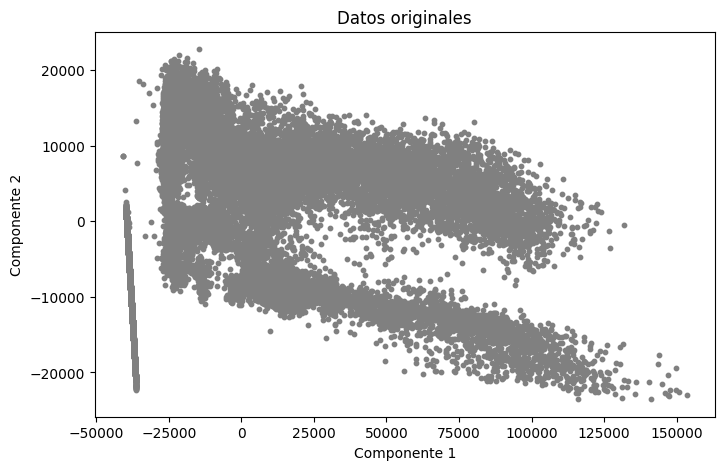

In [37]:
# Usamos PCA para reducir a 2D (en caso de que el dataset tenga más dimensiones)
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)
centroids_2D = pca.transform(kmeans.cluster_centers_)

# Etiquetas generadas por KMeans
labels = kmeans.labels_

# -------- Gráfico 1: solo los datos --------
plt.figure(figsize=(8, 5))
plt.scatter(X_2D[:, 0], X_2D[:, 1], s=10, c='gray')
plt.title("Datos originales")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
#plt.grid(True)
plt.show()


In [38]:
# 5. Obtener representantes (uno por cada centroide)
idxs = np.argmin(X_dist, axis=0)
X_representatives = X[idxs]
# 6. Etiquetas artificiales para entrenamiento supervisado
# (etiquetamos solo a los representantes con su índice del cluster)
y_representatives = np.arange(k)


In [39]:
# 7. Entrenar modelo con esos representantes
model = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
model.fit(X_representatives, y_representatives)

LogisticRegression(max_iter=5000, random_state=42)

In [40]:
# 8. Predecir etiquetas para todo el conjunto
y_pred = model.predict(X)
y_true = kmeans.predict(X)  # etiquetas reales del clustering

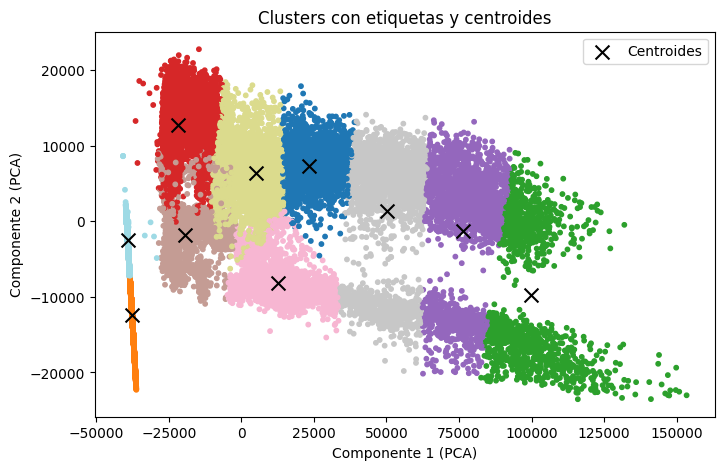

In [41]:
plt.figure(figsize=(8, 5))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=labels, cmap='tab20', s=10)
plt.scatter(centroids_2D[:, 0], centroids_2D[:, 1], c='black', marker='x', s=100, label='Centroides')
plt.title("Clusters con etiquetas y centroides")
plt.xlabel("Componente 1 (PCA)")
plt.ylabel("Componente 2 (PCA)")
plt.legend()
#plt.grid(True)
plt.show()

In [42]:
# 9. Evaluar precisión
accuracy = accuracy_score(y_true, y_pred)
print(f"Precisión del modelo entrenado con representantes: {accuracy*100:.4f}%")


Precisión del modelo entrenado con representantes: 78.7880%
